In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [51]:
import math
import os.path

import keras
import sklearn
import pandas
import numpy
import seaborn
from matplotlib import pyplot as plt

from microesc import urbansound8k, preprocess, train, test, stm32convert, stats, settings, models, features, common

import test1


In [3]:
dataset = test1.loadfiles()
dataset.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class,embeddings
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,"[[2.1236882, 0.81460965, 3.5231187, 3.7944224,..."
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,"[[1.7620703, 1.2691782, 3.2583752, 2.5146453, ..."
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,"[[1.8254017, 2.1947274, 3.260826, 2.316478, 3...."
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,"[[2.0583222, 1.9921124, 3.250255, 2.719343, 3...."
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,"[[1.8772528, 1.23503, 3.252353, 2.717335, 3.24..."


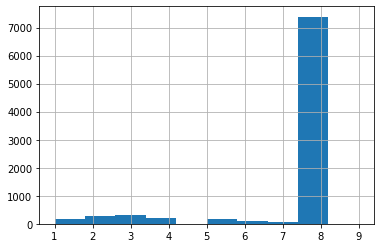

In [13]:
embedding_times = dataset['embeddings'].apply(lambda emb: emb.shape[0])
embedding_times.hist()

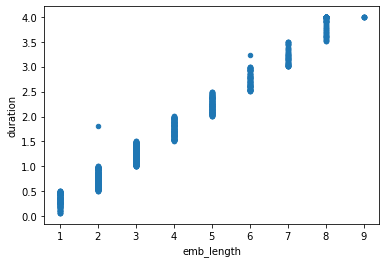

In [15]:
times = dataset.copy()
times['emb_length'] = embedding_times
times['duration'] = times.end - times.start
times.plot.scatter(x='emb_length', y='duration')

(400, 512)
(400, 200)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.057s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 4.824787
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.824036
[t-SNE] KL divergence after 1000 iterations: 0.830674


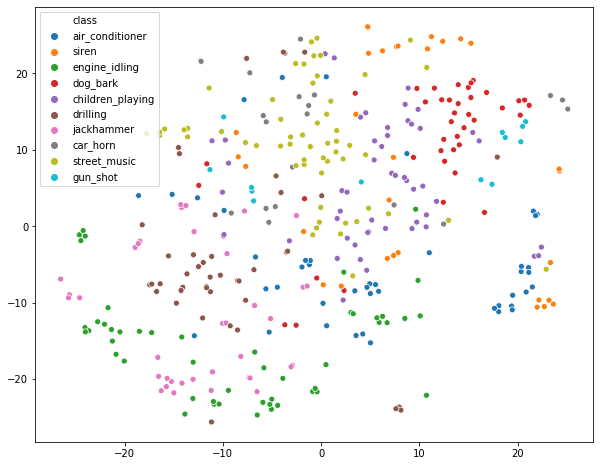

In [77]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def summarize_embedding(emb):
    return numpy.mean(emb, axis=0)

samples = dataset.sample(400)

embeddings = samples['embeddings'].apply(summarize_embedding)
embeddings = numpy.stack(embeddings.values)
print(embeddings.shape) 

pca = PCA(n_components=200, whiten=False)
emb_pca = pca.fit_transform(embeddings)
print(emb_pca.shape)

var = pca.explained_variance_ratio_

tsne = TSNE(n_components=2, verbose=1)
emb_tsne = tsne.fit_transform(emb_pca)

fig, ax = plt.subplots(figsize=(10,8))
#ax.scatter(emb_tsne[:,1], emb_tsne[:,0], c=samples['classID'])
seaborn.scatterplot(x=emb_tsne[:,1], y=emb_tsne[:,0], hue=samples['class'])


In [54]:
len(samples['classID'].unique())

10

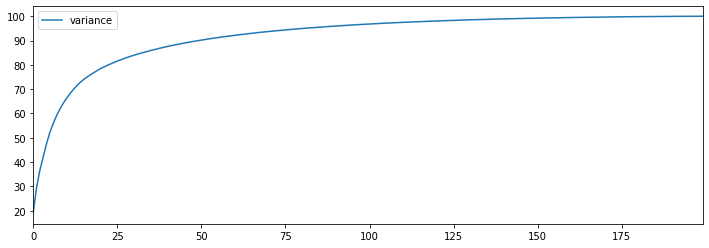

In [70]:
pandas.DataFrame({'variance': var*100}).cumsum().plot(figsize=(12,4))